<a href="https://colab.research.google.com/github/Hasithadissanayaka/FOT-MT-ETM4272/blob/main/b5_tha3_443.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install supervision and ultralytics on google colab

In [2]:


# Reinstall the packages
!pip install supervision ultralytics

# Import the packages
import supervision as sv
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import time
from google.colab.patches import cv2_imshow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [3]:
# Load the segmentation model
model = YOLO("yolov8s-seg.pt")  # Load the segmentation model, ensure you have the segmentation model

# Read the image
image_path = "/content/drive/MyDrive/Colab Notebooks/cars1.jpg"  # Change this to your image file
image = cv2.imread(image_path)

# Run segmentation on the image
results = model(image)[0]

largest_area =0
largest_index = -1


100%|██████████| 22.8M/22.8M [00:00<00:00, 135MB/s] 



0: 416x640 14 cars, 785.3ms
Speed: 16.5ms preprocess, 785.3ms inference, 79.6ms postprocess per image at shape (1, 3, 416, 640)


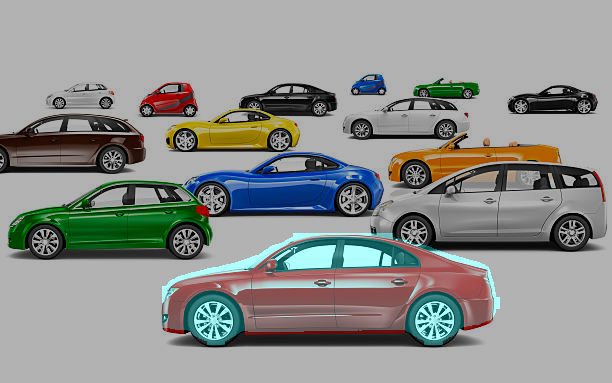

In [4]:
 # Iterate through detected objects
for i, (box, mask) in enumerate(zip(results.boxes.xyxy, results.masks.data)):
    x1, y1, x2, y2 = box
    area = (x2 - x1) * (y2 - y1)

    if area > largest_area:
        largest_area = area
        largest_index = i

# Draw the largest mask if a car is detected
if largest_index != -1:
    mask = results.masks.data[largest_index].cpu().numpy()  # Convert mask to NumPy array
    mask = (mask * 255).astype(np.uint8)  # Convert to 8-bit grayscale

    # Resize the mask to match the image size
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    # Create an RGB mask with a custom color (Change the color as needed)
    color = (255, 255, 0)  # Green mask in (B, G, R) format
    rgb_mask = np.zeros_like(image, dtype=np.uint8)  # Create an empty RGB image
    rgb_mask[mask > 0] = color  # Apply the chosen color where the mask is non-zero

    # Overlay the mask on the original image
    image = cv2.addWeighted(image, 0.7, rgb_mask, 0.3, 0)  # Blend images

# Display the result using cv2_imshow() from google.colab.patches
cv2_imshow(image)  # Use cv2_imshow to display the image


3.1.2 Draw the Segmentation Mask of the Largest Car: Using Ultralytics + Supervision Libraries

In [5]:
# Load the segmentation model
model = YOLO('yolov8s-seg.pt')  # Load the segmentation model

# Read the image
image_path = "/content/drive/MyDrive/Colab Notebooks/cars1.jpg"  # Change this to your image file
image = cv2.imread(image_path)

In [6]:
# Run segmentation on the image
results = model(image)[0]

# Transfer Ultralytics results to Supervision
detections = sv.Detections.from_ultralytics(results)


0: 416x640 14 cars, 724.2ms
Speed: 6.5ms preprocess, 724.2ms inference, 89.1ms postprocess per image at shape (1, 3, 416, 640)


In [7]:
largest_mask = None
largest_area = 0

# Iterate through the masks & find the largest
for mask in detections.mask:
    area = mask.sum()  # Calculate the area of the mask
    if area > largest_area:
        largest_area = area
        largest_mask = mask

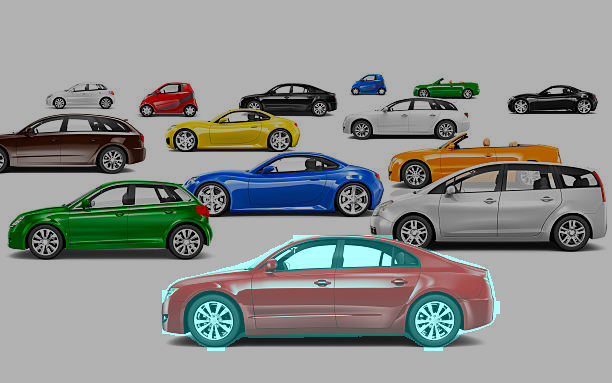

In [8]:
# Display the largest mask if found
if largest_mask is not None:
    # Resize the mask to match the image size
    resized_mask = cv2.resize(largest_mask.astype(np.uint8), (image.shape[1], image.shape[0]))

    # Create an RGB mask with a custom color (Change the color as needed)
    color = (255, 255, 0)  # Green mask in (B, G, R) format
    rgb_mask = np.zeros_like(image, dtype=np.uint8)  # Create an empty RGB image
    rgb_mask[resized_mask > 0] = color  # Apply the chosen color where the mask is non-zero

    # Overlay the mask on the original image
    image = cv2.addWeighted(image, 0.7, rgb_mask, 0.3, 0)  # Blend images

    # Display the result using cv2_imshow() from google.colab.patches
    from google.colab.patches import cv2_imshow
    cv2_imshow(image)  # Use cv2_imshow to display the image

3.2 Estimate distance to centroid of chai

In [9]:
# Load the segmentation model
model = YOLO("yolov8s-seg.pt")  # Load YOLOv8 segmentation model

# Read the image
image_path = "/content/drive/MyDrive/Colab Notebooks/kingChair.jpg"  # Path to uploaded image
image = cv2.imread(image_path)

# Run segmentation on the image
results = model(image)[0]

chair_index = -1
largest_area = 0
chair_centroid = None



0: 384x640 1 chair, 516.1ms
Speed: 4.8ms preprocess, 516.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


This one used for my confirmation purpose only. Appropriate answer in in bellow

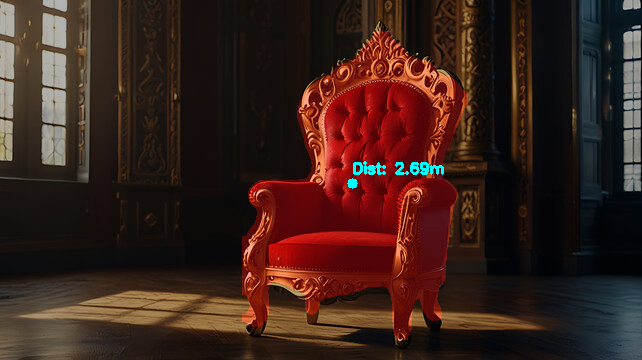

In [10]:
# Iterate through detected objects
for i, (box, mask, cls) in enumerate(zip(results.boxes.xyxy, results.masks.data, results.boxes.cls)):
    x1, y1, x2, y2 = box
    area = (x2 - x1) * (y2 - y1)

    # Check if the detected object is a chair (YOLO class ID for "chair" is typically 56)
    if int(cls) == 56:  # Adjust this if needed based on YOLO model output
        if area > largest_area:
            largest_area = area
            chair_index = i
            chair_centroid = ((x1 + x2) // 2, (y1 + y2) // 2)

# Estimate distance using a simple depth formula
def estimate_distance(box_height, known_height=1.2, focal_length=600):
    """
    Distance estimation formula:
    Distance = (Known Height * Focal Length) / Box Height
    """
    if box_height == 0:
        return None
    return (known_height * focal_length) / box_height

# Draw results on the image
if chair_index != -1:
    mask = results.masks.data[chair_index].cpu().numpy()  # Convert mask to NumPy array
    mask = (mask * 255).astype(np.uint8)  # Convert to 8-bit grayscale

    # Resize the mask to match the image size
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    # Create an RGB mask with a custom color
    color = (0, 0, 255)  # Red mask for the chair
    rgb_mask = np.zeros_like(image, dtype=np.uint8)
    rgb_mask[mask > 0] = color  # Apply the chosen color

    # Overlay the mask on the original image
    image = cv2.addWeighted(image, 0.7, rgb_mask, 0.3, 0)

#Draw the centroid  #This line was previously indented incorrectly. It should be at the same level as 'if chair_index != -1:'
if chair_centroid:
    cx, cy = chair_centroid
    cv2.circle(image, (int(cx), int(cy)), 5, (255, 255, 0), -1)  # Draw centroid in yellow

    # Estimate distance
    chair_height = largest_area ** 0.5  # Approximate height from area
    distance = estimate_distance(chair_height)

    # Display estimated distance on the image
    cv2.putText(image, f"Dist: {distance:.2f}m", (int(cx), int(cy - 10)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

# Display the result
cv2_imshow(image)

3.2 Estimate distance to centroid of chair

In [11]:
from transformers import pipeline  # For loading Hugging Face pipeline


# Load the object detection model
model = YOLO("yolov8n.pt")  # You can replace with a more specific chair detection model

# Load the depth estimation model using Hugging Face pipeline
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")

def detect_chair(image_path):
    image = cv2.imread(image_path)
    results = model(image)[0]

    for detection in results.boxes:
        class_id = int(detection.cls)
        if results.names[class_id] == "chair":
            x1, y1, x2, y2 = map(int, detection.xyxy[0])
            centroid_x = (x1 + x2) // 2
            centroid_y = (y1 + y2) // 2

            # Draw bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box

            # Draw centroid
            cv2.circle(image, (centroid_x, centroid_y), 5, (0, 0, 255), -1)  # Red dot

            return image, (centroid_x, centroid_y), (x1, y1, x2, y2)

    return image, None, None


100%|██████████| 6.25M/6.25M [00:00<00:00, 74.4MB/s]
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu



0: 384x640 1 chair, 245.7ms
Speed: 5.4ms preprocess, 245.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Estimated depth at centroid (352, 181): 140 cm


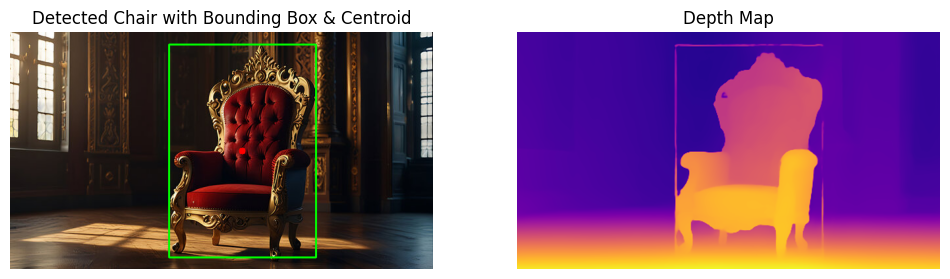

In [13]:
def get_depth_at_centroid(image, centroid):
    if centroid is None:
        print("No chair detected!")
        return None, None

    # Convert the image to RGB format (DepthAnything model might expect RGB format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert OpenCV image to PIL Image
    pil_image = Image.fromarray(image_rgb)

    # Get the depth map using Hugging Face pipeline
    depth_map_pil = pipe(pil_image)["depth"]

    # Convert PIL Image to numpy array for easy indexing
    depth_map = np.array(depth_map_pil)

    # Extract depth value at the centroid position
    depth_value = depth_map[centroid[1], centroid[0]]  # Access depth at centroid
    return depth_map, depth_value

# Main Execution
image_path = "/content/drive/MyDrive/Colab Notebooks/kingChair.jpg"
image, centroid, bbox = detect_chair(image_path)

if centroid:
    depth_map, depth_value = get_depth_at_centroid(image, centroid)
    print(f"Estimated depth at centroid {centroid}: {depth_value} cm")

    # Plot the image and depth map
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original image with bounding box and centroid
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax1.set_title('Detected Chair with Bounding Box & Centroid')
    ax1.axis('off')

    # Plot the depth map
    ax2.imshow(depth_map, cmap='plasma')  # Use a colormap for better visualization
    ax2.set_title('Depth Map')
    ax2.axis('off')

    # Display the plots
    plt.show()
else:
    print("Chair not detected in the image.")

In [14]:
!pip install gdown


In [15]:
import gdown
import os

file_id = "1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4"
direct_url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(direct_url, "vehicles_video.mp4", quiet=False)




Downloading...
From: https://drive.google.com/uc?id=1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4
To: /content/vehicles_video.mp4
100%|██████████| 35.3M/35.3M [00:00<00:00, 93.7MB/s]


'vehicles_video.mp4'


3.3.1 Draw bounding boxes around the "cars" using supervision

In [16]:
 from ultralytics import YOLO

 model = YOLO("yolo11n.pt")

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)
    # Plot the results on the frame. Note: This might modify the frame in-place
    results[0].plot()
    # Return the processed frame
    return frame

sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_tracking.mp4",
    callback=callback
)

100%|██████████| 5.35M/5.35M [00:00<00:00, 55.6MB/s]



0: 384x640 3 cars, 1 truck, 485.9ms
Speed: 21.5ms preprocess, 485.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 553.7ms
Speed: 15.9ms preprocess, 553.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 348.2ms
Speed: 15.5ms preprocess, 348.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 218.7ms
Speed: 5.0ms preprocess, 218.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 236.9ms
Speed: 4.5ms preprocess, 236.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 589.8ms
Speed: 8.3ms preprocess, 589.8ms inference, 11.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 270.6ms
Speed: 4.5ms preprocess, 270.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 225.8ms
Speed: 7.1ms p

3.3.1 Track the cars. Add the tracker id to the bounding boxes around the cars. Use supervision

In [17]:
from ultralytics import YOLO
import supervision as sv
import numpy as np
import cv2  # For video file checking

# Load the YOLO model
print("Loading YOLO model...")
model = YOLO("yolov8n.pt")  # Make sure this file exists

# Initialize the BYTETrack tracker
print("Initializing tracker...")
tracker = sv.ByteTrack()

# Check if video file exists and can be opened
video_path = "vehicles_video.mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print(f"Error: Cannot open video file '{video_path}'. Check the file path!")
cap.release()


def callback(frame: np.ndarray, _: int) -> np.ndarray:
    """ Processes each frame: detects objects, tracks them, and annotates the frame. """
    print("\n--- Processing New Frame ---")

    # Perform object detection
    results = model(frame)

    # Print results for debugging
    print("YOLO Results:", results)

    if isinstance(results, list):
        results = results[0]  # Get the first YOLO results object

    # Convert YOLO results to supervision detections
    try:
        detections = sv.Detections.from_ultralytics(results)
        print("Detections created successfully.")
    except Exception as e:
        print("Error creating Detections:", e)
        return frame  # Return the original frame if detection fails

    # Print available attributes in detections for debugging
    print("Detections Attributes:", dir(detections))

    # Update the tracker with the detections
    try:
        tracker.update_with_detections(detections)
        track_ids = tracker.get_track_ids()  # Get assigned tracking IDs
        print("Track IDs:", track_ids)
    except Exception as e:
        print("Error in tracking:", e)
        return frame

    # Annotate the frame
    annotator = sv.BoxAnnotator()

    # Create labels for detected objects
    try:
        labels = [
            f"{tracker.get_class_name(class_id)} {track_id}"
            for class_id, track_id in zip(detections.class_id, track_ids)
        ]
    except Exception as e:
        print("Error creating labels:", e)
        labels = []

    frame = annotator.annotate(scene=frame, detections=detections, labels=labels)
    print("Frame annotation completed.")

    return frame


# Process the video
print("Processing video...")
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_tracking_with_ids.mp4",
    callback=callback
)

print("Processing completed. Check 'result_tracking_with_ids.mp4' for output.")


Streaming output truncated to the last 5000 lines.
       [[102, 103, 108],
        [102, 103, 108],
        [102, 103, 108],
        ...,
        [100,  98, 103],
        [100,  98, 103],
        [100,  98, 103]],

       [[102, 103, 108],
        [102, 103, 108],
        [102, 103, 108],
        ...,
        [100,  98, 103],
        [100,  98, 103],
        [100,  98, 103]],

       [[102, 103, 108],
        [102, 103, 108],
        [102, 103, 108],
        ...,
        [100,  98, 103],
        [100,  98, 103],
        [100,  98, 103]]], dtype=uint8)
orig_shape: (2160, 3840)
path: 'image0.jpg'
probs: None
save_dir: 'runs/detect/predict'
speed: {'preprocess': 4.54258918762207, 'inference': 147.24278450012207, 'postprocess': 1.0509490966796875}]
Detections created successfully.
Detections Attributes: ['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__g

3.3.2 Draw the track traces for the tracked cars. Use supervision

In [18]:
from ultralytics import YOLO
import supervision as sv
import numpy as np
import cv2  # For video file checking

# Load the YOLO model
print("Loading YOLO model...")
model = YOLO("yolov8n.pt")  # Make sure this file exists

# Initialize the BYTETrack tracker
print("Initializing tracker...")
tracker = sv.ByteTrack()

# Check if video file exists
video_path = "vehicles_video.mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print(f"Error: Cannot open video file '{video_path}'. Check the file path!")
cap.release()

# Store track traces for each object
track_history = {}  # Dictionary to store the past positions of each track ID

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    """ Processes each frame: detects objects, tracks them, and annotates the frame. """
    print("\n--- Processing New Frame ---")

    # Perform object detection
    results = model(frame)

    # Print results for debugging
    print("YOLO Results:", results)

    if isinstance(results, list):
        results = results[0]  # Get the first YOLO results object

    # Convert YOLO results to supervision detections
    try:
        detections = sv.Detections.from_ultralytics(results)
        print("Detections created successfully.")
    except Exception as e:
        print("Error creating Detections:", e)
        return frame  # Return the original frame if detection fails

    # Update the tracker with the detections
    try:
        tracker.update_with_detections(detections)
        track_ids = tracker.get_track_ids()  # Get assigned tracking IDs
        print("Track IDs:", track_ids)
    except Exception as e:
        print("Error in tracking:", e)
        return frame

    # Annotate the frame
    annotator = sv.BoxAnnotator()
    line_annotator = sv.LineAnnotator(thickness=2)  # Used to draw track traces

    # Extract bounding box centers to track movement
    new_track_history = {}

    for box, class_id, track_id in zip(detections.xyxy, detections.class_id, track_ids):
        x_center = int((box[0] + box[2]) / 2)  # X-center of bounding box
        y_center = int((box[1] + box[3]) / 2)  # Y-center of bounding box
        center = (x_center, y_center)

        # Store tracking history (limit to last 30 frames for smoothness)
        if track_id not in track_history:
            track_history[track_id] = []
        track_history[track_id].append(center)
        track_history[track_id] = track_history[track_id][-30:]  # Keep last 30 positions

        # Store for drawing
        new_track_history[track_id] = track_history[track_id]

    # Draw tracking lines (motion paths)
    for track_id, points in new_track_history.items():
        line_annotator.annotate(frame, points)

    # Create labels for detected objects
    try:
        labels = [
            f"{tracker.get_class_name(class_id)} {track_id}"
            for class_id, track_id in zip(detections.class_id, track_ids)
        ]
    except Exception as e:
        print("Error creating labels:", e)
        labels = []

    # Draw bounding boxes and labels
    frame = annotator.annotate(scene=frame, detections=detections, labels=labels)
    print("Frame annotation completed.")

    return frame


# Process the video
print("Processing video...")
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_tracking_with_traces.mp4",
    callback=callback
)

print("Processing completed. Check 'result_tracking_with_traces.mp4' for output.")


Streaming output truncated to the last 5000 lines.
        [177, 151, 131],
        [177, 151, 131]],

       ...,

       [[102, 103, 108],
        [102, 103, 108],
        [102, 103, 108],
        ...,
        [100,  98, 103],
        [100,  98, 103],
        [100,  98, 103]],

       [[102, 103, 108],
        [102, 103, 108],
        [102, 103, 108],
        ...,
        [100,  98, 103],
        [100,  98, 103],
        [100,  98, 103]],

       [[102, 103, 108],
        [102, 103, 108],
        [102, 103, 108],
        ...,
        [100,  98, 103],
        [100,  98, 103],
        [100,  98, 103]]], dtype=uint8)
orig_shape: (2160, 3840)
path: 'image0.jpg'
probs: None
save_dir: 'runs/detect/predict'
speed: {'preprocess': 6.02412223815918, 'inference': 228.1630039215088, 'postprocess': 1.2836456298828125}]
Detections created successfully.
Error in tracking: 'ByteTrack' object has no attribute 'get_track_ids'

--- Processing New Frame ---

0: 384x640 2 cars, 1 truck, 239.6ms
Speed: 4.

Explain what "def callback(frame: np.ndarray, _: int) -> np.ndarray:" does.

The function signature def callback(frame: np.ndarray, _: int) -> np.ndarray: defines a Python function named callback that takes two arguments and returns a NumPy array (np.ndarray). Here's a breakdown of its components:

frame: np.ndarray:

This is the first argument, named frame.

It is expected to be a NumPy array (np.ndarray), which typically represents an image or a frame in video processing (e.g., a 2D or 3D array of pixel values).

_: int:

This is the second argument, represented by _.

The underscore (_) is a convention in Python to indicate that this argument is intentionally unused or ignored.

It is annotated as an integer (int), which might represent metadata like a frame index or timestamp, but the function does not use it.

-> np.ndarray:

This specifies that the function returns a NumPy array (np.ndarray).

The returned array could be a modified version of the input frame or a new array computed within the function.